In [26]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import pickle
from matplotlib.backends.backend_pdf import PdfPages

In [25]:
def convert_yuv_to_rgb(d):
    yuv_from_rgb = np.array([[0.299, 0.587, 0.114],
                         [-0.14714119, -0.28886916, 0.43601035],
                         [0.61497538, -0.51496512, -0.10001026]])
    
    foolers = np.zeros((1,32,32,3))
    clean = np.zeros((1,32,32,3))
    keys = list(d)
    curr_key = 0
    for curr_key in range(len(keys)):
        example = d[keys[curr_key]]
        if example[0] == 'fooled' and example[1] != example[2]:
            foolers = np.concatenate((foolers, example[3]), axis=0)
            clean = np.concatenate((clean, example[4]), axis=0)
    
    foolers = foolers[1:,:,:,:]  # remove 0 array
    clean = clean[1:,:,:,:]  # remove 0 array
    
    foolers = np.asarray(foolers).reshape((-1,32,32,3))
    foolers = np.dot(foolers, np.linalg.inv(yuv_from_rgb).T)
    
    clean = np.asarray(clean).reshape((-1,32,32,3))
    clean = np.dot(clean, np.linalg.inv(yuv_from_rgb).T)
    
    valid_example = 0
    for curr_key in range(len(keys)):
        if d[keys[curr_key]][0] == 'fooled' and d[keys[curr_key]][1] != d[keys[curr_key]][2]:
            d[keys[curr_key]][3] = foolers[valid_example]
            d[keys[curr_key]][4] = clean[valid_example]
            valid_example += 1

    return d

normal = pickle.load(open("normal_r32_yuv_normal.p", "rb"))
normal = convert_yuv_to_rgb(normal)

rgb = pickle.load(open("normal_r32_rgb.p", "rb"))

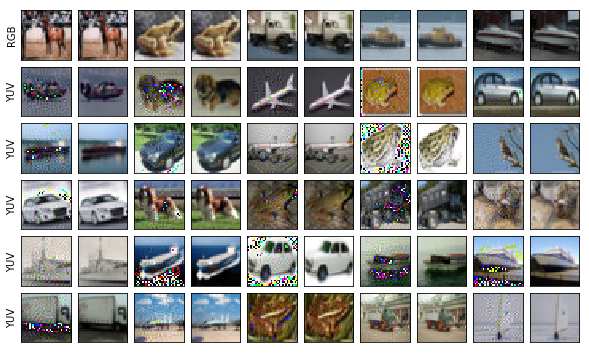

In [32]:
with PdfPages('foolers.pdf') as pdf:
    fig = plt.figure(1, (10, 20))

    rows, cols = 6, 10

    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),
                     axes_pad=0.1,  # pad between axes in inch.
                     )


    rgb_keys = list(rgb)
    np.random.shuffle(rgb_keys)
    rgb_counter = 0

    grid[0].axes.set_ylabel('RGB')
    for i in range(0,cols,2):
        example = rgb[rgb_keys[rgb_counter]]
        no_valid_fooler = True
        while no_valid_fooler:
            if example[0] == 'fooled' and example[1] != example[2]:
                grid[i].axes.xaxis.set_ticklabels([])
                grid[i].axes.yaxis.set_ticklabels([])
                grid[i].axes.xaxis.set_ticks([])
                grid[i].axes.yaxis.set_ticks([])
                grid[i+1].axes.xaxis.set_ticklabels([])
                grid[i+1].axes.yaxis.set_ticklabels([])
                grid[i+1].axes.xaxis.set_ticks([])
                grid[i+1].axes.yaxis.set_ticks([])

                grid[i].imshow(np.squeeze(example[3]), vmin=0, vmax=1)
                grid[i+1].imshow(np.squeeze(example[4]), vmin=0, vmax=1)
                no_valid_fooler = False
            rgb_counter += 1


    normal_keys = list(normal)
    np.random.shuffle(normal_keys)
    n_counter = 0


    for i in range(cols,rows*cols,2):
        if i % cols == 0:
            grid[i].axes.set_ylabel('YUV')
        example = normal[normal_keys[n_counter]]
        no_valid_fooler = True
        while no_valid_fooler:
            if example[0] == 'fooled' and example[1] != example[2]:
                grid[i].axes.xaxis.set_ticklabels([])
                grid[i].axes.yaxis.set_ticklabels([])
                grid[i].axes.xaxis.set_ticks([])
                grid[i].axes.yaxis.set_ticks([])
                grid[i+1].axes.xaxis.set_ticklabels([])
                grid[i+1].axes.yaxis.set_ticklabels([])
                grid[i+1].axes.xaxis.set_ticks([])
                grid[i+1].axes.yaxis.set_ticks([])

                grid[i].imshow(example[3], vmin=0, vmax=1)
                grid[i+1].imshow(example[4], vmin=0, vmax=1)
                no_valid_fooler = False
            n_counter += 1

    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)